In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', -1)

In [2]:
ipl_df = pd.read_csv('IPL_ball_by_ball_updated.csv')
ipl_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [4]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]
ipl_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis=1)

In [6]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('deva') else 0)


In [7]:
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [8]:
ipl_df.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022], dtype=int64)

In [9]:
ipl_df['batting_team'] = ipl_df['batting_team'].replace(['Rising Pune Supergiant', 'Rising Pune Supergiants'], 'RPS')
ipl_df['bowling_team'] = ipl_df['bowling_team'].replace(['Rising Pune Supergiant', 'Rising Pune Supergiants'], 'RPS')

In [10]:
ipl_df['batting_team'] = ipl_df['batting_team'].replace(['RPS'], 'Rising Pune Supergiants')
ipl_df['bowling_team'] = ipl_df['bowling_team'].replace(['RPS'], 'Rising Pune Supergiants')

In [11]:
ipl_df.innings.unique()

array([2, 1], dtype=int64)

In [12]:
ipl_df = ipl_df.sort_values('innings', ascending = True)

In [13]:
ipl_df[ipl_df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

1    10515
0    8661 
4    2829 
2    1706 
6    1259 
3    98   
5    46   
7    9    
Name: total_runs, dtype: int64

In [14]:
ipl_df[ipl_df.batting_team == 'Mumbai Indians'].total_runs.value_counts()

1    11336
0    9974 
4    3198 
2    1721 
6    1403 
3    104  
5    54   
7    7    
Name: total_runs, dtype: int64

In [15]:
t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

In [16]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1) & (ipl_df.season == 2019)].match_id.unique()

array([1181768, 1178419, 1175370], dtype=int64)

In [17]:
required_match_id = 1181768

In [18]:
ipl_df[ipl_df.match_id == required_match_id].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
178902,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,11.5,Mumbai Indians,Chennai Super Kings,KH Pandya,Ishan Kishan,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [19]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [20]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [21]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [22]:
t1_outcomes_count = []
t2_outcomes_count = []

for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        


for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [23]:
t1_outcomes_count

[9974, 11336, 1721, 104, 3198, 1403, 1378]

In [24]:
t2_outcomes_count

[8661, 10515, 1706, 98, 2829, 1259, 1087]

In [25]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [26]:
t1_pb, t2_pb

([0.3425843236930686,
  0.3893659407845023,
  0.05911245448924916,
  0.003572164594353232,
  0.10984406127636188,
  0.04818987428728447,
  0.047331180875180325],
 [0.33114127317912445,
  0.4020263811890652,
  0.06522653412349455,
  0.0037468935194035556,
  0.10816287516727204,
  0.04813611164213343,
  0.041559931179506786])

In [27]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [28]:
i1p_0 = t1_cum_pb[0]
i1p_1 = t1_cum_pb[1]
i1p_2 = t1_cum_pb[2]
i1p_3 = t1_cum_pb[3]
i1p_4 = t1_cum_pb[4]
i1p_6 = t1_cum_pb[5]
i1p_w = 1

pred_runs = 0
pred_wkts = 0

for i in range(120):
    r_value = np.random.random()
    
    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wkts += 1
        if pred_wkts == 10:
            break

In [29]:
def innings_1_runs(curr_overs, curr_score, curr_wkts):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1
    
    pred_runs = curr_score
    pred_wkts = curr_wkts
    
    over_ball = curr_overs
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    if ball_no >= 6:
        ball_no = 6
    current_ball = over_no*6 + ball_no
    left_over_balls = 120 - current_ball
    
    for i in range(left_over_balls):
        
        r_value = np.random.random()
        
        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wkts += 1
            if pred_wkts == 10:
                break
                
    return pred_runs

In [30]:
innings_1_runs(10.5, 120, 3)

192

In [31]:
def innings_2_runs(curr_overs, curr_score, curr_wkts, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2pw = 1
    
    pred_runs = curr_score
    pred_wkts = curr_wkts
    
    over_ball = curr_overs
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    if ball_no >= 6:
        ball_no = 6
    current_balls = over_no*6 + ball_no
    left_over_balls = 120 - current_balls
    
    for i in range(left_over_balls):
        
        r_value = np.random.random()
        
        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wkts += 1
            if pred_wkts == 10:
                break
                
        if pred_runs > target:
            break
            
    return pred_runs

In [32]:
innings_2_runs(11.4, 95, 4, 149)

151

In [33]:
mdf = ipl_df[ipl_df.match_id == required_match_id]
mdf.reset_index(drop = True, inplace = True)
mdf.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,11.5,Mumbai Indians,Chennai Super Kings,KH Pandya,Ishan Kishan,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,11.6,Mumbai Indians,Chennai Super Kings,KH Pandya,Ishan Kishan,Imran Tahir,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [34]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [35]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

df_ing1.reset_index(drop = True, inplace = True)
df_ing2.reset_index(drop = True, inplace = True)

In [36]:
curr_score = 0
curr_overs = 0.0
curr_wkts = 0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_wkts += df_ing1.isOut[i]
    curr_overs = df_ing1.ball[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wkts)
    
    #print('score:',curr_score,' ', 'overs:',curr_overs,' ', 'wickets:',curr_wkts,' ', 'prediction: ',prediction)
    
    ing1_runs_pred.append(prediction)

In [37]:
ing1_actual_score = sum(df_ing1.total_runs)

In [38]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)#
#    print('target: ', target)
#    print('score: ', curr_score,' ', ' overs: ', curr_overs,' ', ' wickets: ', curr_wickets,' ', ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

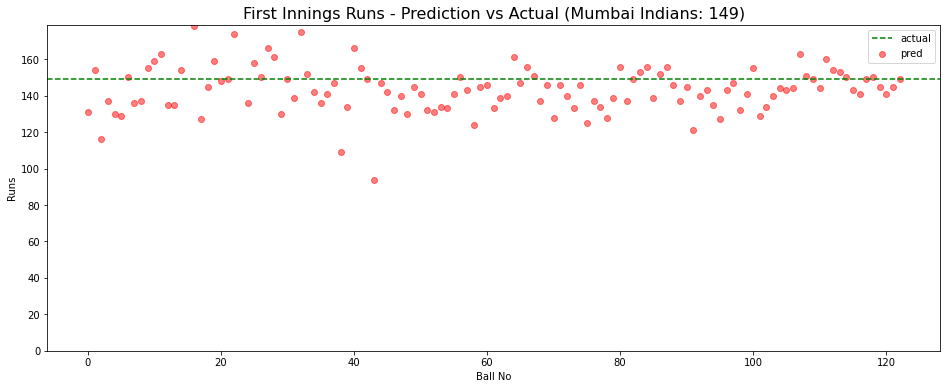

In [39]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [40]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

10.845528455284553

In [41]:
ing2_actual_score = sum(df_ing2.total_runs)

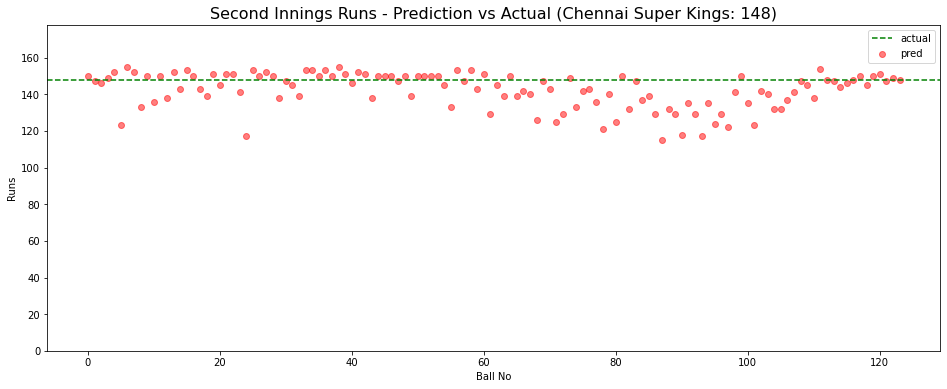

In [42]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [43]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

7.967741935483871

In [44]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
        #print(ing1_prediction, ing2_prediction)
        
        
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [45]:
len(win_count_ls),len(tie_count_ls),len(lose_count_ls)

(123, 123, 123)

In [46]:
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    target = ing1_actual_score
    
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
        #print(target, ing2_prediction)
        
        
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [47]:
len(win_count_ls),len(tie_count_ls),len(lose_count_ls)

(247, 247, 247)

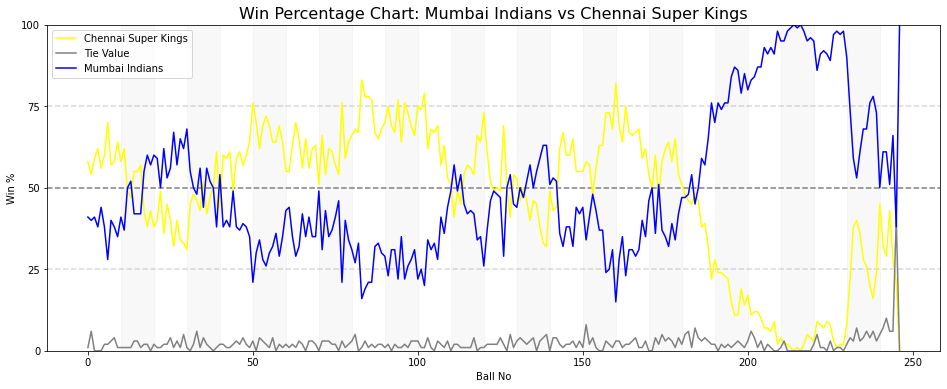

In [48]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'yellow', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()

## Interactive model

In [49]:
def getpbvalues(teamName):
    
    if teamName == 'MI':
        p_0 = t1_cum_pb[0]
        p_1 = t1_cum_pb[1]
        p_2 = t1_cum_pb[2]
        p_3 = t1_cum_pb[3]
        p_4 = t1_cum_pb[4]
        p_6 = t1_cum_pb[5]
        p_w = 1
        
    elif teamName == 'CSK':
        p_0 = t2_cum_pb[0]
        p_1 = t2_cum_pb[1]
        p_2 = t2_cum_pb[2]
        p_3 = t2_cum_pb[3]
        p_4 = t2_cum_pb[4]
        p_6 = t2_cum_pb[5]
        p_w = 1
        
    return p_0,p_1,p_2,p_3,p_4,p_6,p_w

In [50]:
def predict_runs(target, curr_score, curr_overs, curr_wkts):
    
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = getpbvalues('MI')
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = getpbvalues('CSK')
    
    pred_runs = curr_score
    pred_wkts = curr_wkts
    left_over_balls = 120 - curr_overs*6
    
    for i in range(left_over_balls):
        
        r_value = np.random.random()
        
        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wkts += 1
            if pred_wkts == 10:
                break
        if pred_runs > target:
            break
            
    return pred_runs
    

In [51]:
predict_runs(149, 133, 5, 18.2)

153

In [52]:
def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'lose'

In [53]:
target = 167

current_score = 87
current_wickets = 1
current_overs = 10

iter_count = 100

runs_ls = []
results_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(iter_count):
    pred_runs = predict_runs(target, current_score, current_wickets, current_overs)
    runs_ls.append(pred_runs)
    result_pred = get_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'win':
        win_count += 1
    elif result_pred == 'tie':
        tie_count += 1
    else:
        lose_count +=1

In [54]:
win_count, tie_count, lose_count

(100, 0, 0)

In [55]:
def find_runs(curr_score, target, at_overs, curr_wkts):
    
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(curr_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = predict_runs(target, i, curr_wkts, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            # print('runs: ', i, ' win%: ', win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            # print('Runs to be: ', req_runs[i])
            break

    return required_runs

In [56]:
find_runs(133, 149, 5, 18)

135

In [57]:
def find_wkts(curr_score, target, curr_wkts, at_overs):

    req_runs = find_runs(curr_score, target, curr_wkts, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(curr_wkts, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
#             pred_runs = predict_runs(target, req_runs, i, at_overs)
            pred_runs = predict_runs(target, curr_score, i, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

    req_wicket_value = curr_wkts
    
    for i in range(len(req_wks)):
        if (win_ls[i] < 45)  :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

In [58]:
find_wkts(79, 149, 3, 12)

3

In [59]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

def find_runs_wkts(curr_score, curr_wkts, at_overs, target_score):
    
    plt.figure(figsize=(16,6))
    x = np.array(list(range(21)))
    req_value = find_runs(curr_score, target_score, curr_wkts, at_overs)
    req_wk_value = find_wkts(curr_score, target_score, curr_wkts, at_overs)
    
    if at_overs == 18:
        req_value = curr_score
        req_wk_value = curr_wkts
        
        # print(req_value)
    y = np.array([req_value for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'CSK has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should CSK be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

In [60]:
interactive_plot = interactive(find_runs_wkts,curr_score = widgets.IntSlider(min=1, max=250, step=1, value=1), curr_wkts = widgets.IntSlider(min=1, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score = widgets.IntSlider(min=0, max=250, step=1, value=149))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(IntSlider(value=1, description='curr_score', max=250, min=1), IntSlider(value=1, descrip…